### Query

make $i_{mag} < 18$ and $\text{WD/M}$ pairs


```
SELECT *
FROM mean_param
JOIN magnitudes ON mean_param.iau_name = magnitudes.iau_name
WHERE magnitudes.i < 18 AND mean_param.type = 'WD/M';

```

In [2]:
import csv
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import astropy.units as u
from astropy.modeling.models import Sine1D
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
palette = sns.color_palette()
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
# Make query seperated by commas instead of spaces
with open('og_band_query.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')

    with open('comma_band_query.csv', 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        
        # Iterate through each row
        for row in reader:
            # Replace spaces for commas for each element
            modified_row = [column.replace(' ', ',') for column in row]
            
            writer.writerow(modified_row)

### SDSSJ002200.03+004149.4
*row 1*

In [5]:
star1_result = lk.search_lightcurve('SDSSJ002200.03+004149.4', mission='TESS')
star1_result

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 70 2023   SPOC     120   293372732      0.0

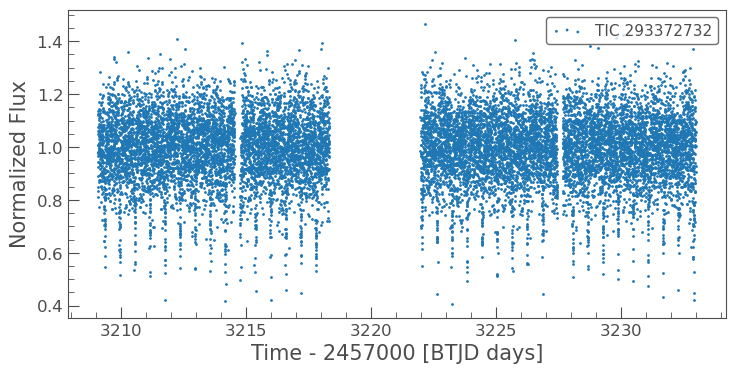

In [6]:
star1_lc = star1_result[0].download().remove_nans().remove_outliers().normalize()
star1_lc.scatter(color=palette[0])
plt.show()

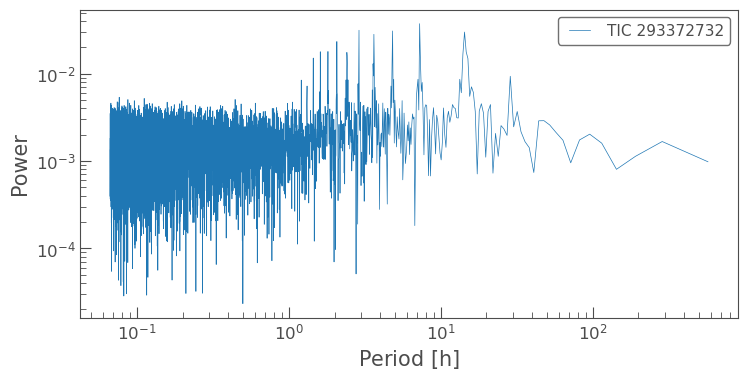

In [7]:
star1_pg = star1_lc.to_periodogram(oversample_factor=1)
star1_pg.plot(color = palette[0], view  = 'period', scale = 'log', unit = u.hr);
plt.show()

In [8]:
star1_pg.period, star1_pg.power, star1_pg.period_at_max_power

(<Quantity [2.38997637e+01, 1.19498819e+01, 7.96658791e+00, ...,
            2.77871919e-03, 2.77839616e-03, 2.77807320e-03] d>,
 <Quantity [0.00097777, 0.00166677, 0.00112814, ..., 0.00115773, 0.00039227,
            0.00180895]>,
 <Quantity 0.30252865 d>)

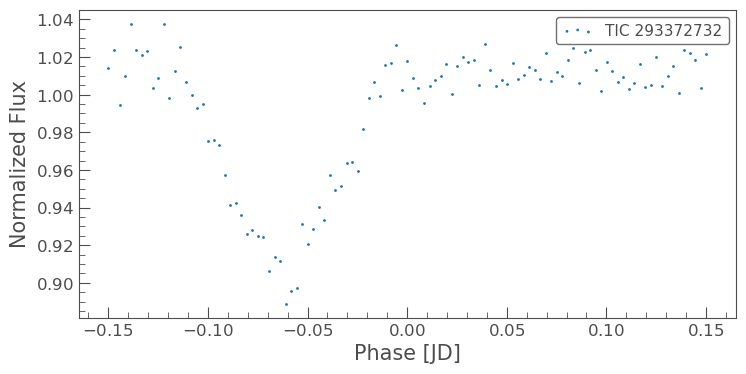

In [10]:
period_fold_lc = star1_lc.fold(period=star1_pg.period_at_max_power).bin(4*u.min).scatter(color = palette[0]);
plt.show()

*maybe figure out a way to check if the line is a flat line?*

In [9]:
period_fold_lc

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

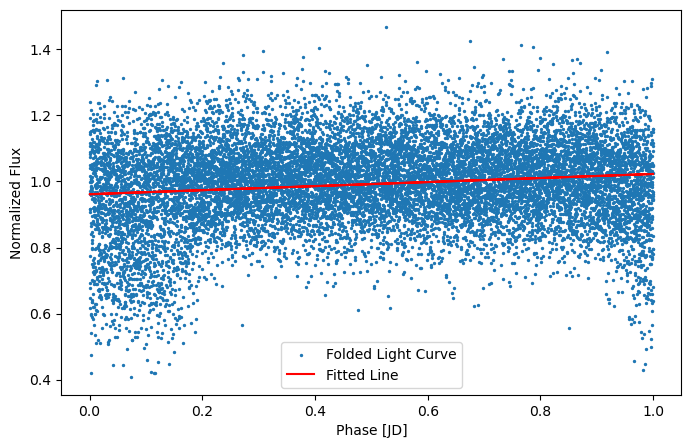

Slope of the fitted line: 0.06135396297278533
Intercept of the fitted line: 0.9614403573192629


In [10]:
# Extract phase and normalized flux values
phase = (star1_lc.time.jd % star1_pg.period_at_max_power.value) / star1_pg.period_at_max_power.value
normalized_flux = star1_lc.flux
x = phase[:, np.newaxis] 

# Fit linear regression model
model = LinearRegression().fit(x, normalized_flux)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the folded light curve and the fitted line
plt.figure(figsize=(8,5))
plt.scatter(phase, normalized_flux, color=palette[0], label='Folded Light Curve', s=2)
plt.plot(phase, model.predict(x), color='red', label='Fitted Line')

plt.xlabel('Phase [JD]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

print("Slope of the fitted line:", slope)
print("Intercept of the fitted line:", intercept)


### SDSSJ003336.49+004151.3
*row 2*

In [11]:
star2_result = lk.search_lightcurve('SDSSJ003336.49+004151.3', mission='TESS')
star2_result

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 70 2023   SPOC     120   257342896      0.0

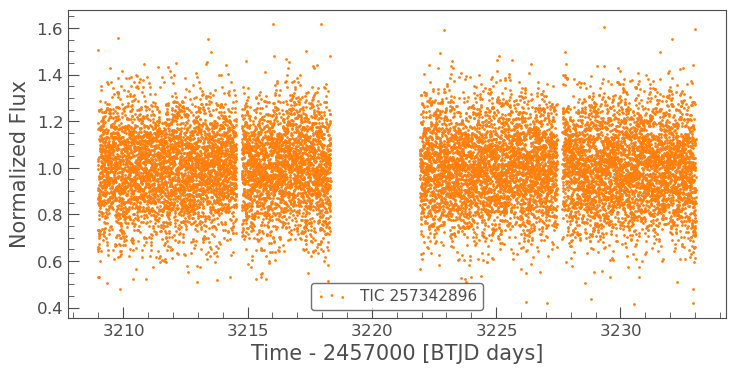

In [12]:
star2_lc = star2_result[0].download().remove_nans().remove_outliers().normalize()
star2_lc.scatter(color=palette[1])
plt.show()

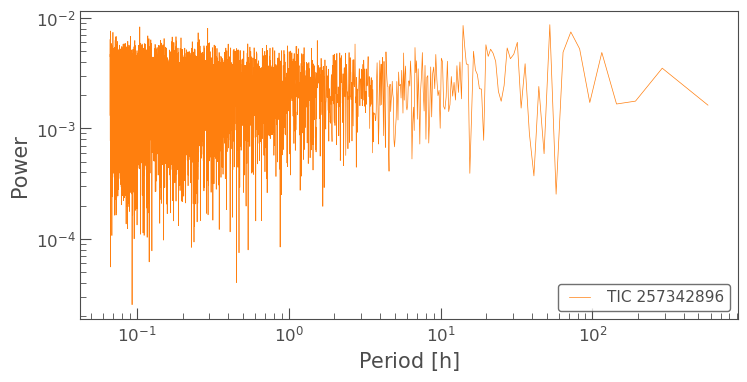

In [13]:
star2_pg = star2_lc.to_periodogram(oversample_factor=1)
star2_pg.plot(color = palette[1], view  = 'period', scale = 'log', unit = u.hr);
plt.show()

In [14]:
star1_pg.period, star1_pg.power, star1_pg.period_at_max_power

(<Quantity [2.38997637e+01, 1.19498819e+01, 7.96658791e+00, ...,
            2.77871919e-03, 2.77839616e-03, 2.77807320e-03] d>,
 <Quantity [0.00097777, 0.00166677, 0.00112814, ..., 0.00115773, 0.00039227,
            0.00180895]>,
 <Quantity 0.30252865 d>)

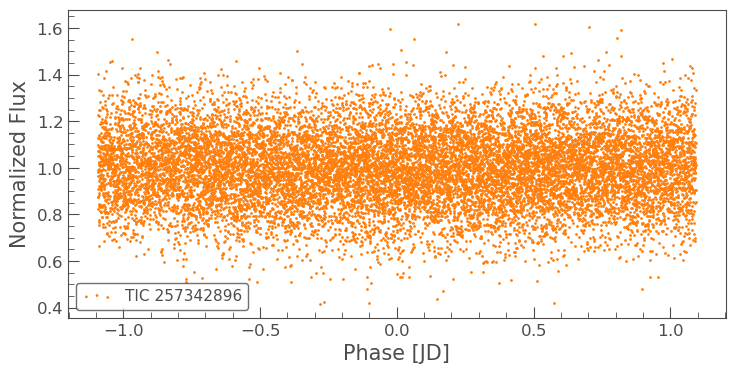

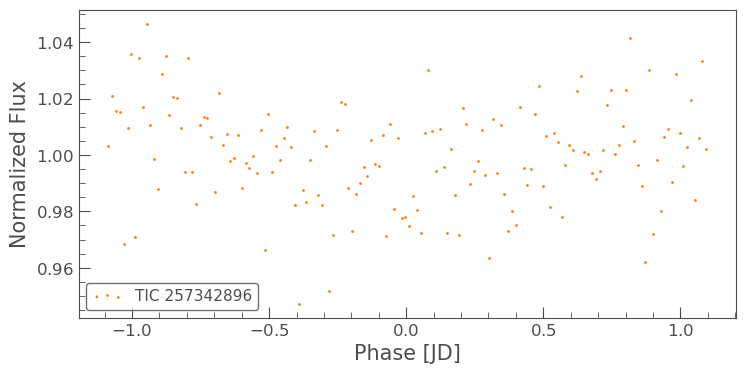

In [22]:
period_fold_lc = star2_lc.fold(period=star2_pg.period_at_max_power).bin(20*u.min).scatter(color = palette[1]);
plt.show()

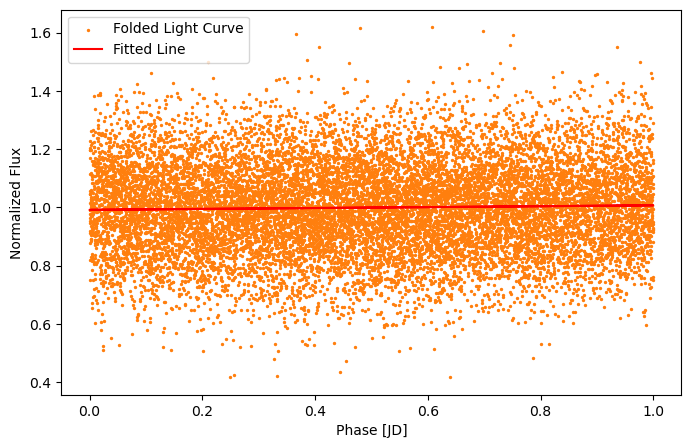

Slope of the fitted line: 0.01547794424146565
Intercept of the fitted line: 0.9918229789504088


In [16]:
# Extract phase and normalized flux values
phase = (star2_lc.time.jd % star2_pg.period_at_max_power.value) / star2_pg.period_at_max_power.value
normalized_flux = star2_lc.flux
x = phase[:, np.newaxis] 

# Fit linear regression model
model = LinearRegression().fit(x, normalized_flux)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the folded light curve and the fitted line
plt.figure(figsize=(8,5))
plt.scatter(phase, normalized_flux, color=palette[1], label='Folded Light Curve', s=2)
plt.plot(phase, model.predict(x), color='red', label='Fitted Line')

plt.xlabel('Phase [JD]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

print("Slope of the fitted line:", slope)
print("Intercept of the fitted line:", intercept)


In [17]:
star2_pg.period_at_max_power.value

2.1858471772650936

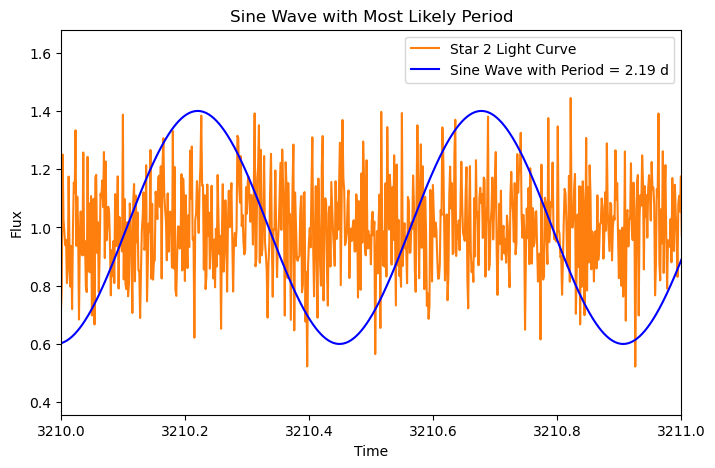

In [18]:
# Retrieve the period at maximum power
most_likely_period = star2_pg.period_at_max_power

# Create a time array for plotting the sine wave
time = star2_lc.time.value
flux = star2_lc.flux

# Create a Sine1D model with the most likely period
sine_model = Sine1D(amplitude=0.4, frequency=most_likely_period.value, phase = 0.2)

# Generate the sine wave
sine_wave = sine_model(time) + 1

# Plot the sine wave
plt.figure(figsize=(8,5))
plt.xlim(3210,3211)
plt.plot(time, flux, color=palette[1], label='Star 2 Light Curve')
plt.plot(time, sine_wave, color='blue', label=f'Sine Wave with Period = {most_likely_period:.2f}')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Sine Wave with Most Likely Period')
plt.legend()
plt.show()


### Plotting all of them

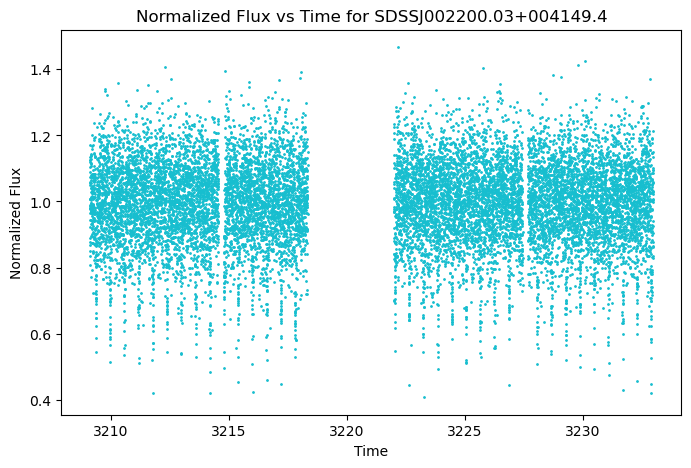

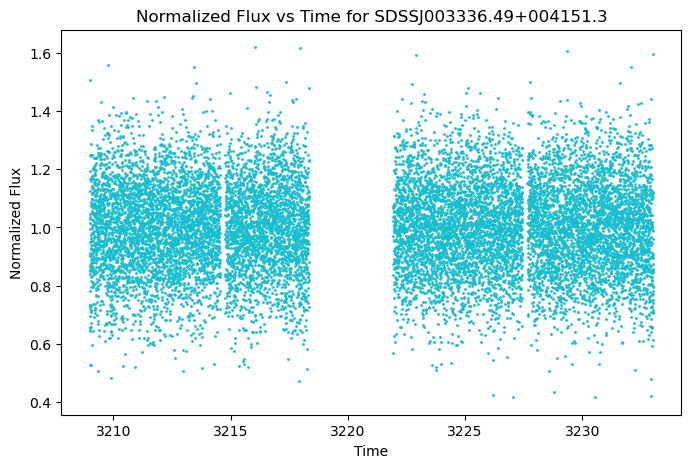

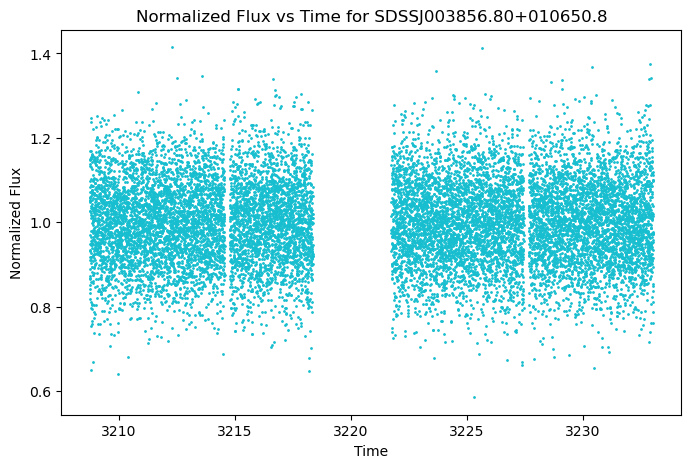

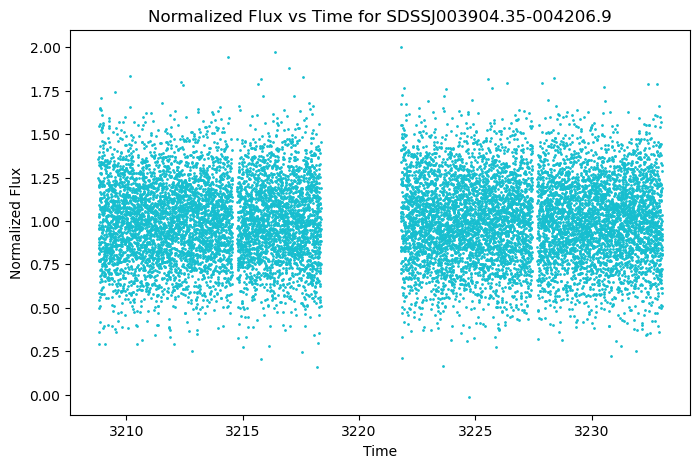

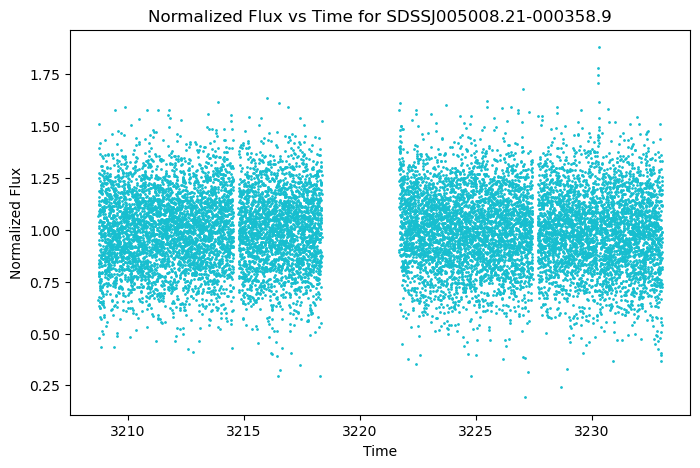

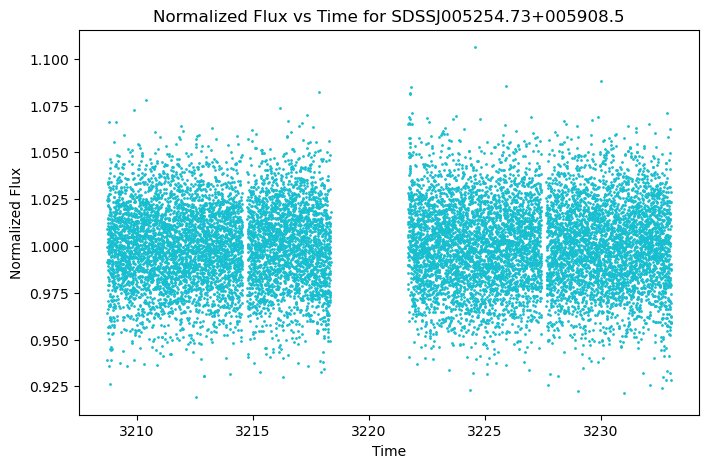

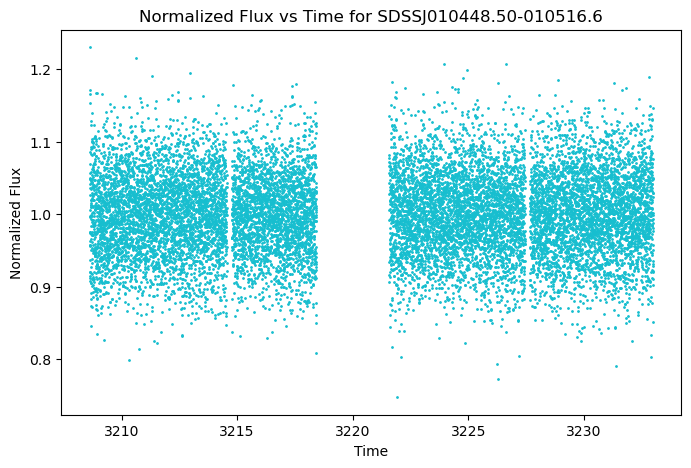

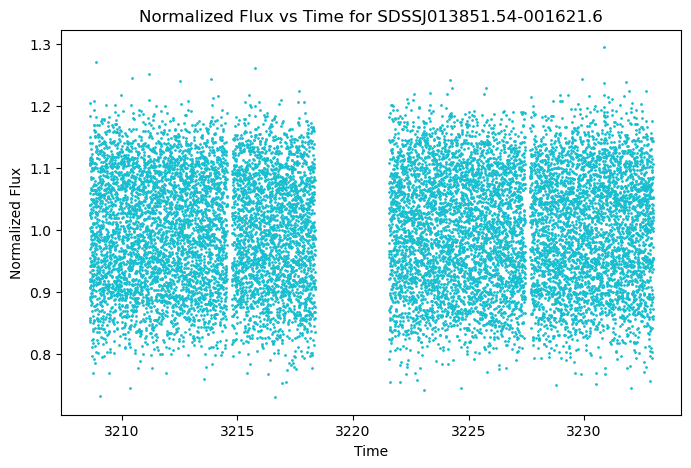

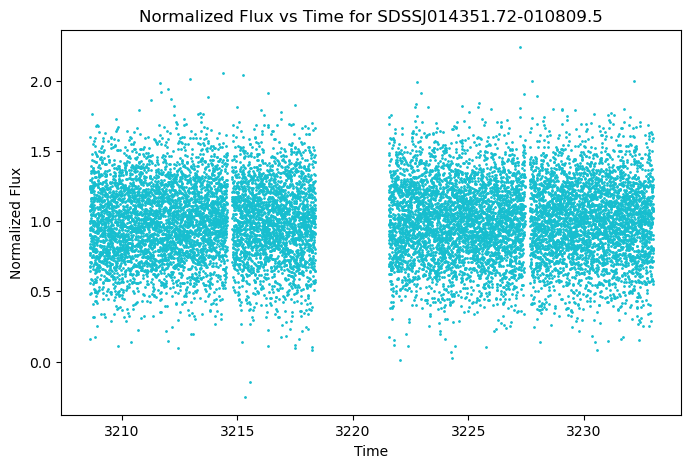

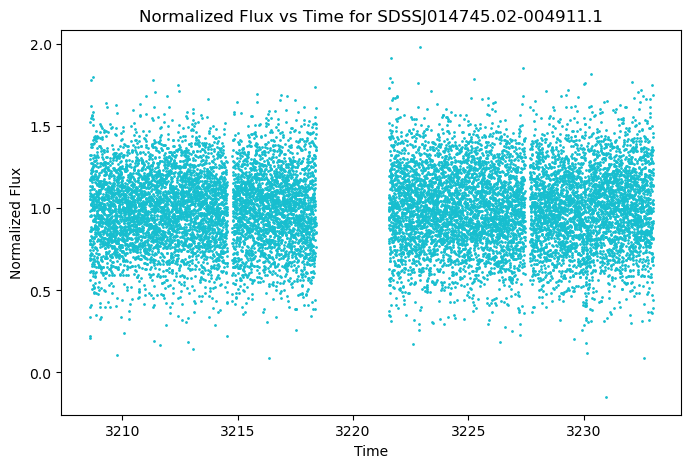

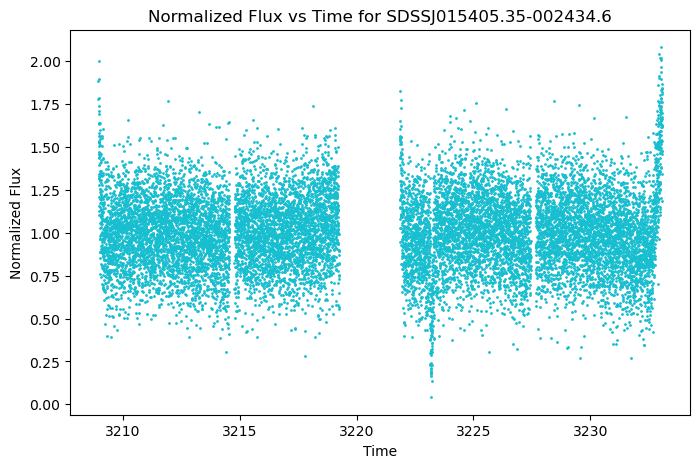

No data found for target "SDSSJ021706.21-000056.2".


No search results for SDSSJ021706.21-000056.2, at col 11


No data found for target "SDSSJ024953.38+000502.3".


No search results for SDSSJ024953.38+000502.3, at col 12


No data found for target "SDSSJ031404.98-011136.6".


No search results for SDSSJ031404.98-011136.6, at col 13


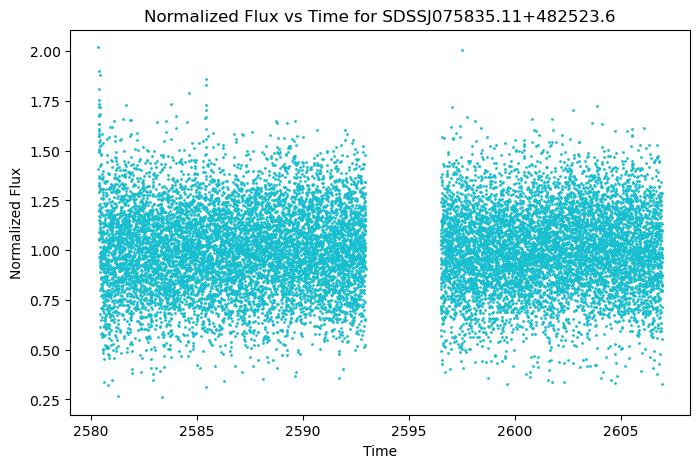

No data found for target "SDSSJ082056.96+190034.0".


No search results for SDSSJ082056.96+190034.0, at col 15


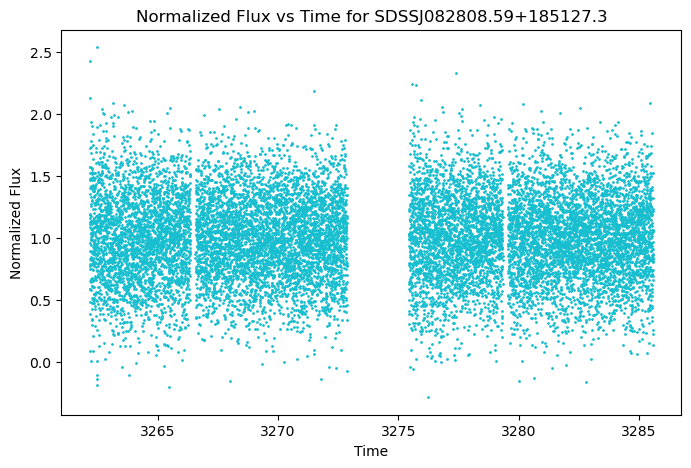

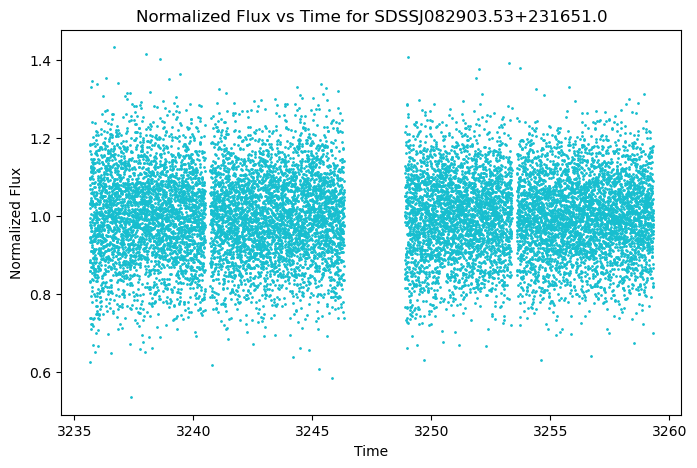

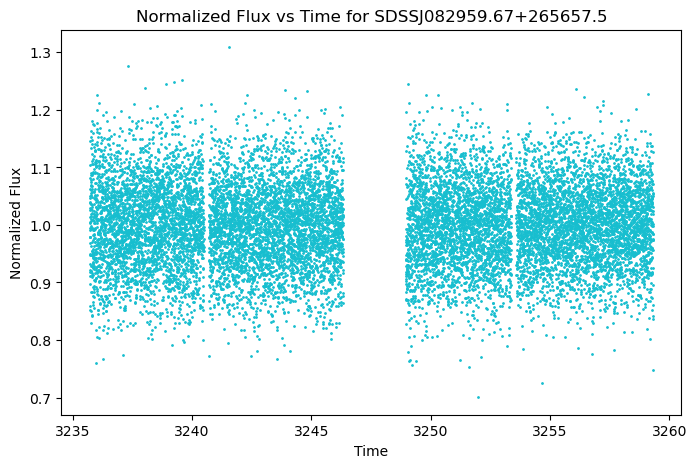

No data found for target "SDSSJ084306.15+362724.3".


No search results for SDSSJ084306.15+362724.3, at col 19


No data found for target "SDSSJ084359.55+172349.9".


No search results for SDSSJ084359.55+172349.9, at col 20


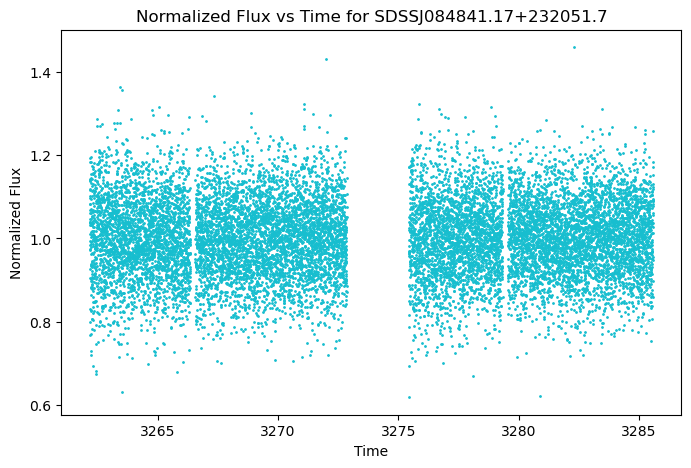

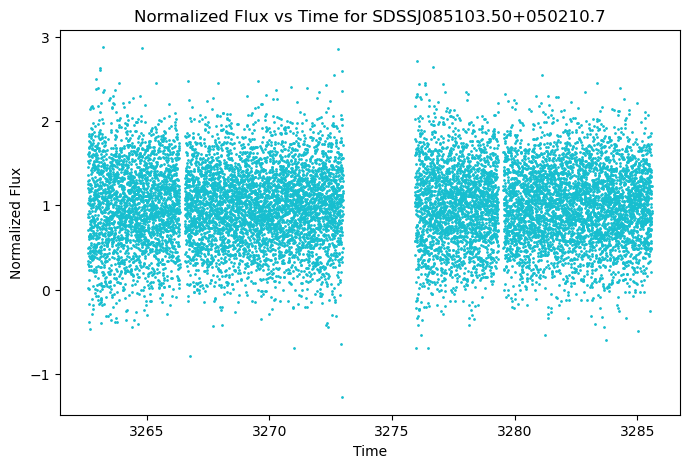

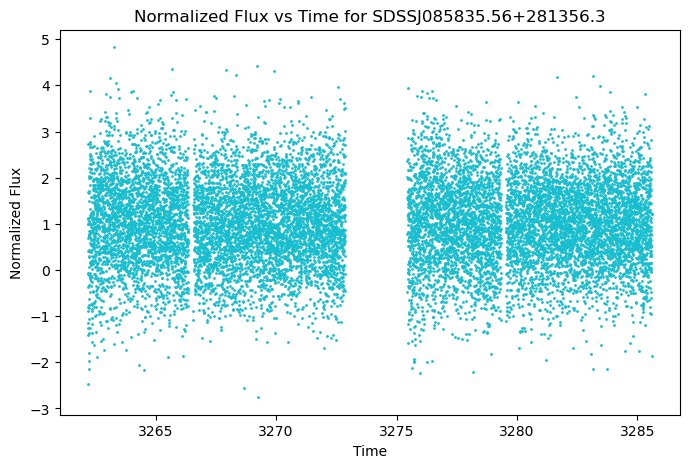

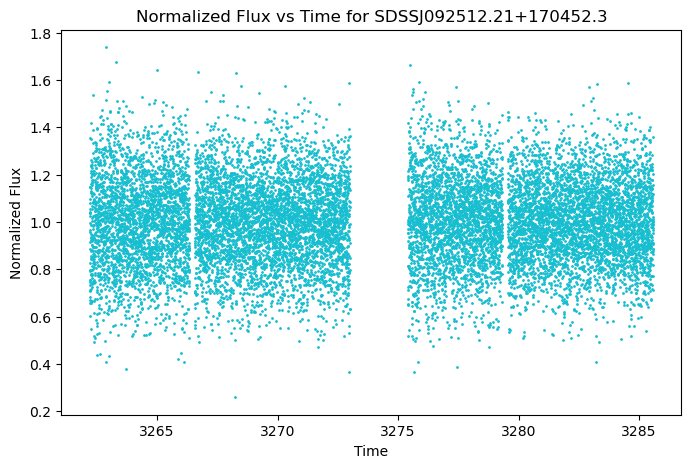

No data found for target "SDSSJ094223.53+295327.7".


No search results for SDSSJ094223.53+295327.7, at col 25


No data found for target "SDSSJ094557.26+413041.7".


No search results for SDSSJ094557.26+413041.7, at col 26


No data found for target "SDSSJ095516.42+393548.1".


No search results for SDSSJ095516.42+393548.1, at col 27


No data found for target "SDSSJ101344.13+391135.7".


No search results for SDSSJ101344.13+391135.7, at col 28


No data found for target "SDSSJ101634.44+333418.0".


No search results for SDSSJ101634.44+333418.0, at col 29


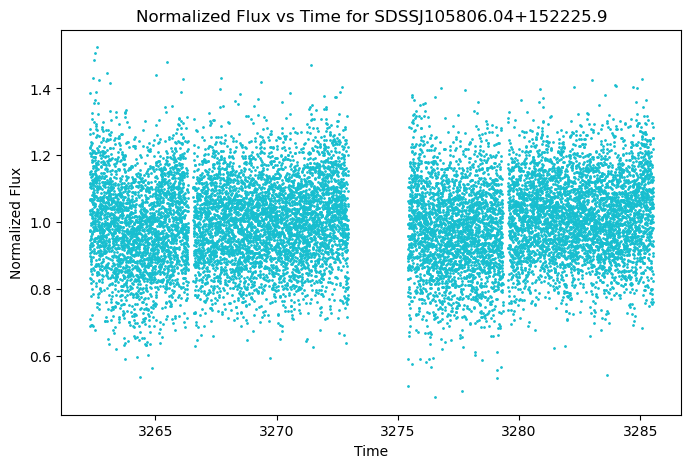

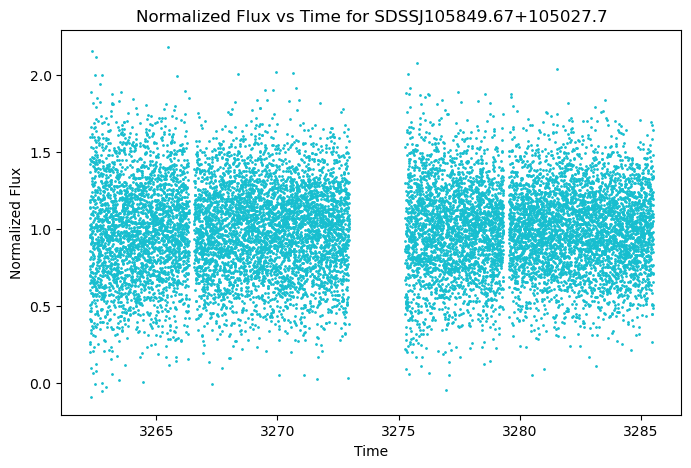

No data found for target "SDSSJ110308.70+304445.4".


No search results for SDSSJ110308.70+304445.4, at col 32


No data found for target "SDSSJ111541.44+361926.2".


No search results for SDSSJ111541.44+361926.2, at col 33


No data found for target "SDSSJ111751.30+290432.3".


No search results for SDSSJ111751.30+290432.3, at col 34


No data found for target "SDSSJ114030.06+154231.5".


No search results for SDSSJ114030.06+154231.5, at col 35


No data found for target "SDSSJ115117.36+310853.1".


No search results for SDSSJ115117.36+310853.1, at col 36


No data found for target "SDSSJ115124.35+371953.7".


No search results for SDSSJ115124.35+371953.7, at col 37


No data found for target "SDSSJ115822.83-022631.8".


No search results for SDSSJ115822.83-022631.8, at col 38


No data found for target "SDSSJ122544.63+381605.3".


No search results for SDSSJ122544.63+381605.3, at col 40


No data found for target "SDSSJ123239.95+450023.3".


No search results for SDSSJ123239.95+450023.3, at col 41


No data found for target "SDSSJ124525.34+343346.9".


No search results for SDSSJ124525.34+343346.9, at col 42


No data found for target "SDSSJ125439.21+315929.6".


No search results for SDSSJ125439.21+315929.6, at col 43


No data found for target "SDSSJ134511.21+504254.7".


No search results for SDSSJ134511.21+504254.7, at col 44


No data found for target "SDSSJ134624.89+021734.2".


No search results for SDSSJ134624.89+021734.2, at col 45


No data found for target "SDSSJ134901.85+020136.5".


No search results for SDSSJ134901.85+020136.5, at col 46


No data found for target "SDSSJ135431.00+415643.9".


No search results for SDSSJ135431.00+415643.9, at col 47


No data found for target "SDSSJ145545.66+341809.5".


No search results for SDSSJ145545.66+341809.5, at col 48


No data found for target "SDSSJ145752.59+031043.0".


No search results for SDSSJ145752.59+031043.0, at col 49


No data found for target "SDSSJ152052.18+342856.0".


No search results for SDSSJ152052.18+342856.0, at col 50


No data found for target "SDSSJ152406.00+522512.6".


No search results for SDSSJ152406.00+522512.6, at col 51


No data found for target "SDSSJ153349.96+344415.0".


No search results for SDSSJ153349.96+344415.0, at col 52


No data found for target "SDSSJ155137.64+070322.3".


No search results for SDSSJ155137.64+070322.3, at col 54


No data found for target "SDSSJ155448.95+080158.2".


No search results for SDSSJ155448.95+080158.2, at col 55


No data found for target "SDSSJ162007.00+061738.8".


No search results for SDSSJ162007.00+061738.8, at col 56


No data found for target "SDSSJ163020.19+305254.5".


No search results for SDSSJ163020.19+305254.5, at col 57


No data found for target "SDSSJ164131.77+212727.2".


No search results for SDSSJ164131.77+212727.2, at col 58


No data found for target "SDSSJ164757.73+371812.1".


No search results for SDSSJ164757.73+371812.1, at col 59


No data found for target "SDSSJ170328.68+234019.6".


No search results for SDSSJ170328.68+234019.6, at col 60


No data found for target "SDSSJ204138.37+005952.0".


No search results for SDSSJ204138.37+005952.0, at col 61


No data found for target "SDSSJ215047.28-072706.5".


No search results for SDSSJ215047.28-072706.5, at col 62


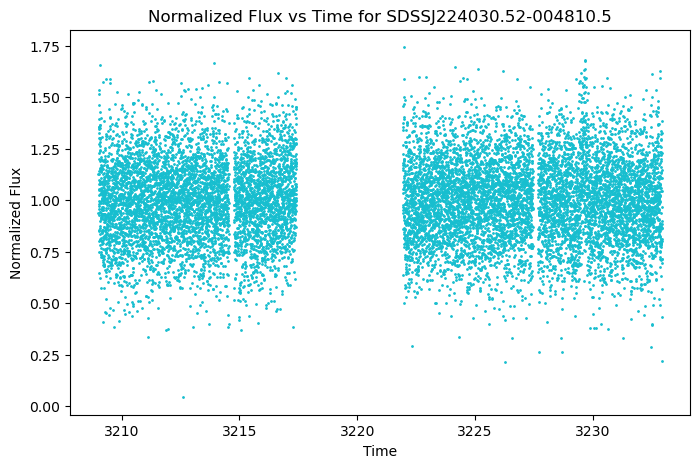

No data found for target "SDSSJ234638.76+434041.7".


No search results for SDSSJ234638.76+434041.7, at col 64


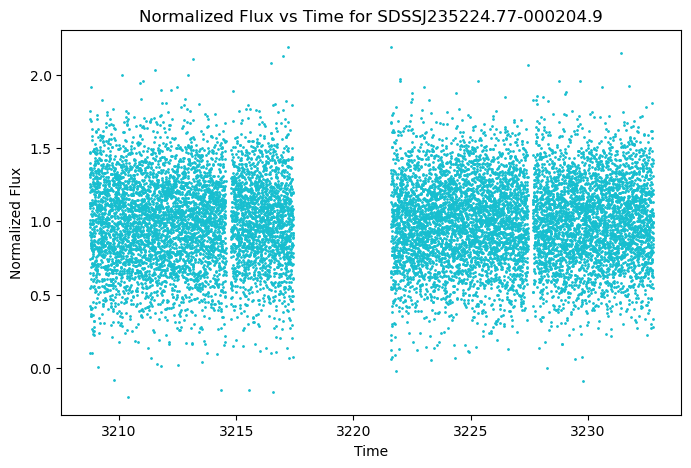

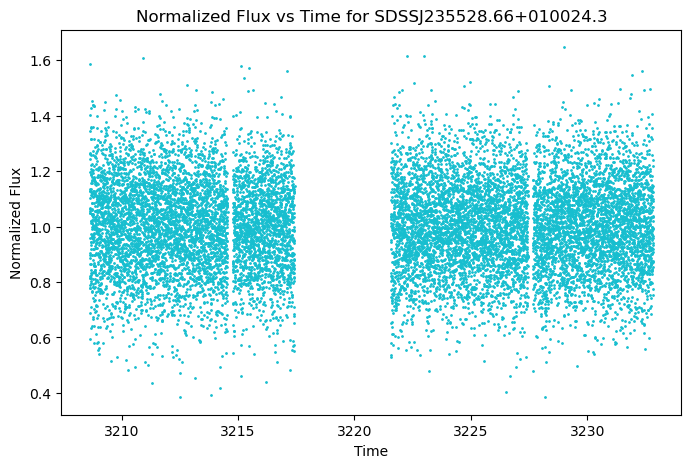

No data found for target "SDSSJ014129.76-103013.9".


No search results for SDSSJ014129.76-103013.9, at col 67


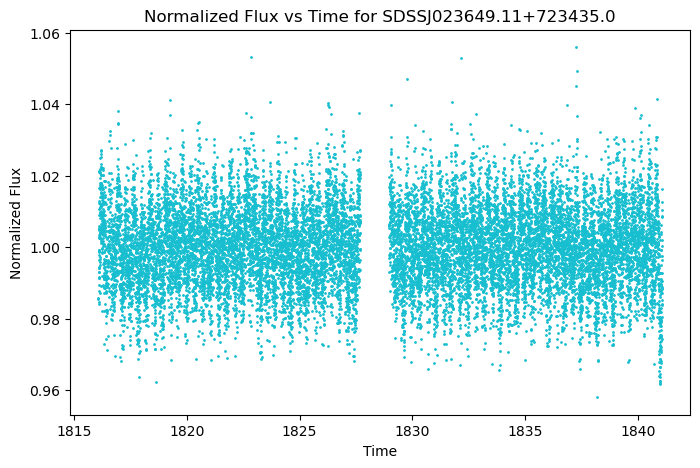

No data found for target "SDSSJ030911.34+374635.4".


No search results for SDSSJ030911.34+374635.4, at col 69


No data found for target "SDSSJ053011.67-004034.6".


No search results for SDSSJ053011.67-004034.6, at col 70


No data found for target "SDSSJ053710.57-010537.1".


No search results for SDSSJ053710.57-010537.1, at col 71


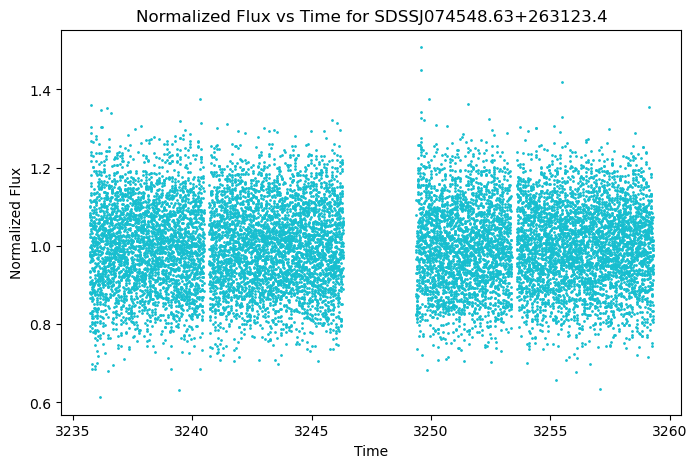

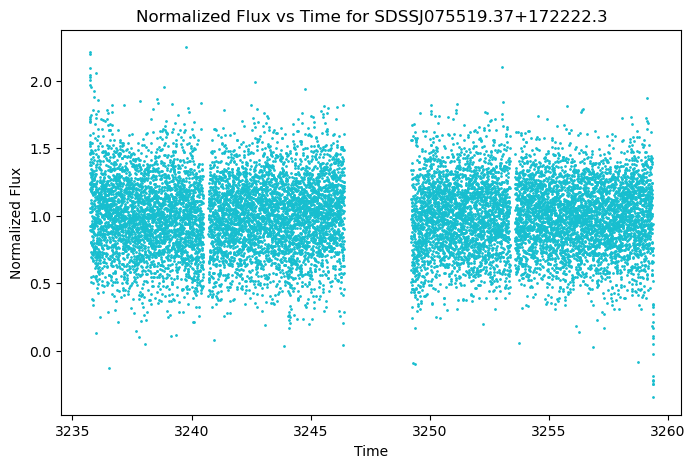

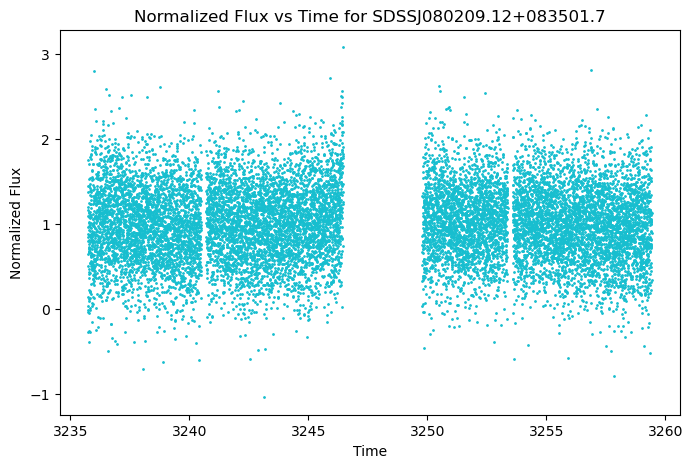

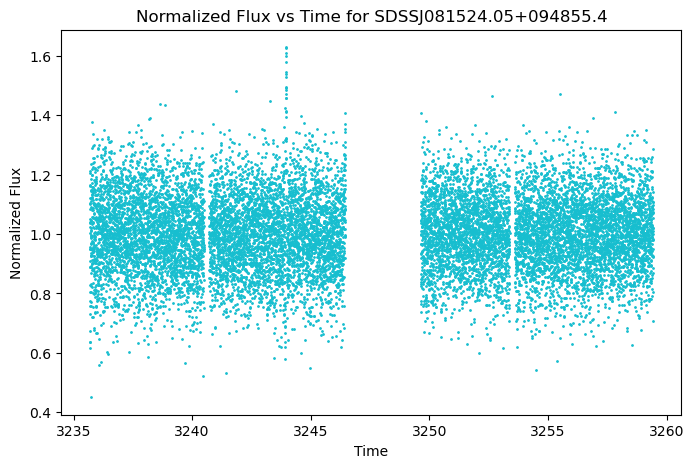

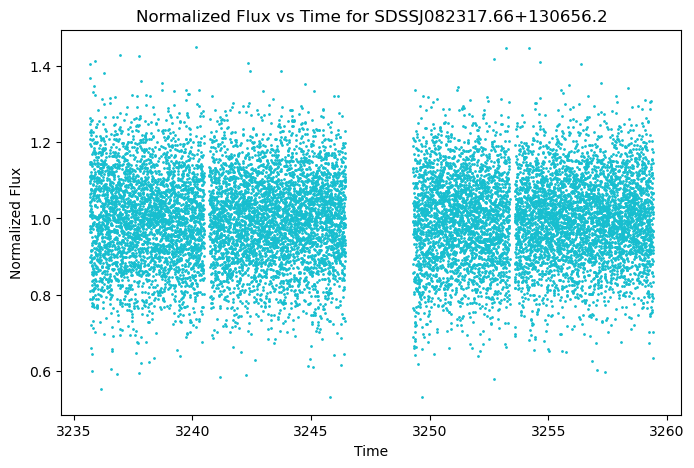

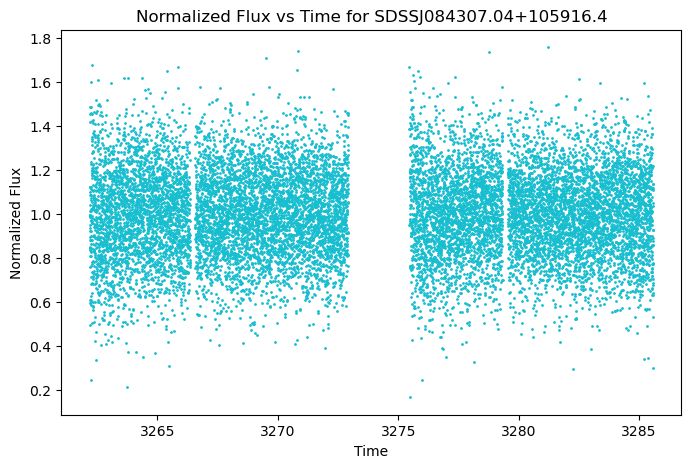

Could not resolve SDSSJ085141.54+120344.1 to a sky position.


No search results for SDSSJ085141.54+120344.1, at col 79


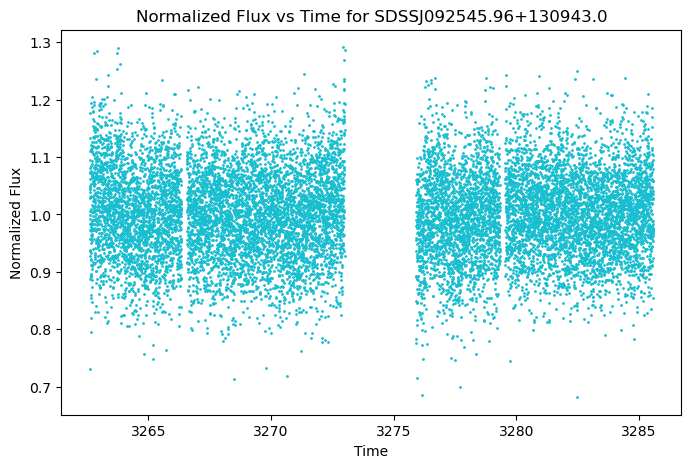

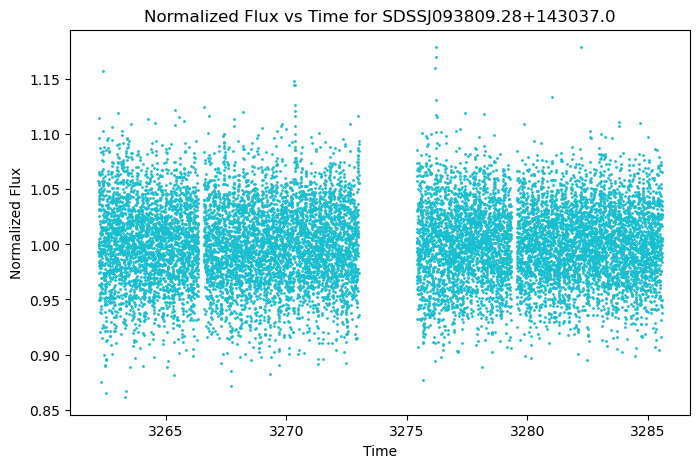

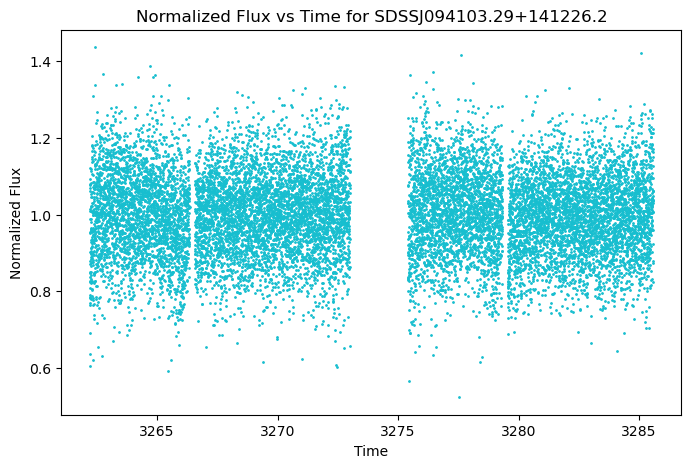

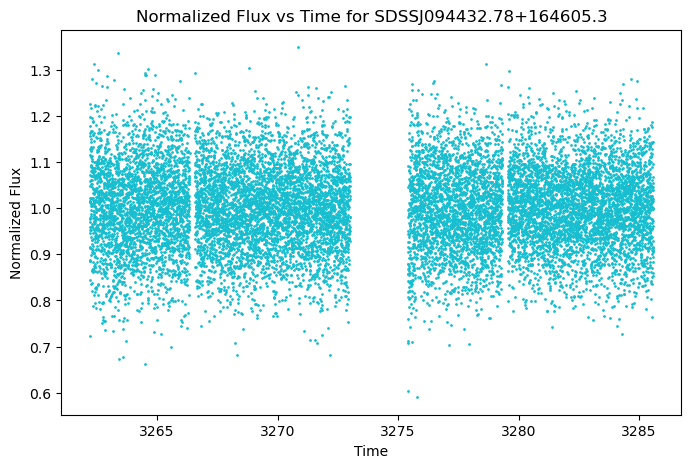

No data found for target "SDSSJ094738.36+165820.8".


No search results for SDSSJ094738.36+165820.8, at col 84


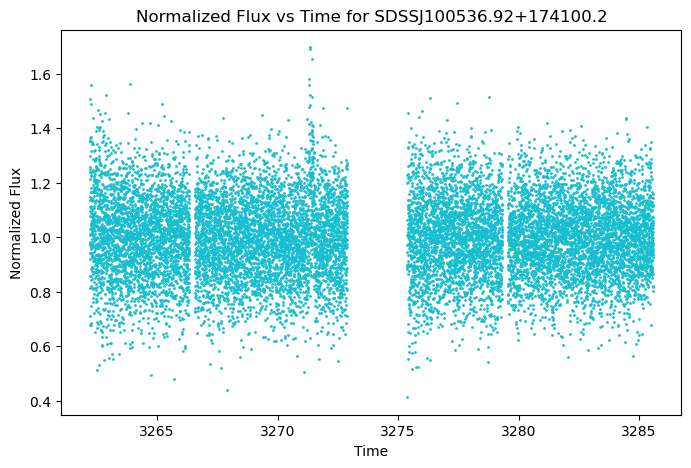

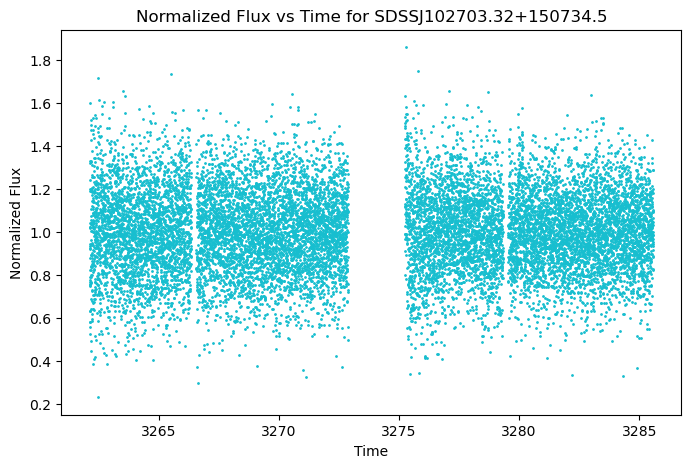

No data found for target "SDSSJ103332.88+434511.4".


No search results for SDSSJ103332.88+434511.4, at col 87


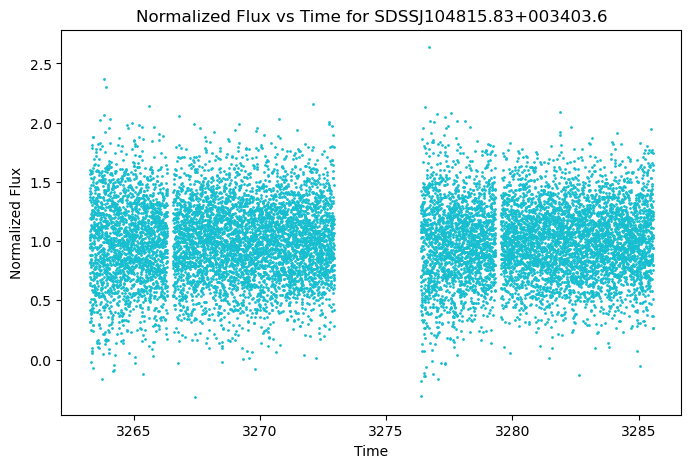

No data found for target "SDSSJ111647.97+182709.4".


No search results for SDSSJ111647.97+182709.4, at col 90


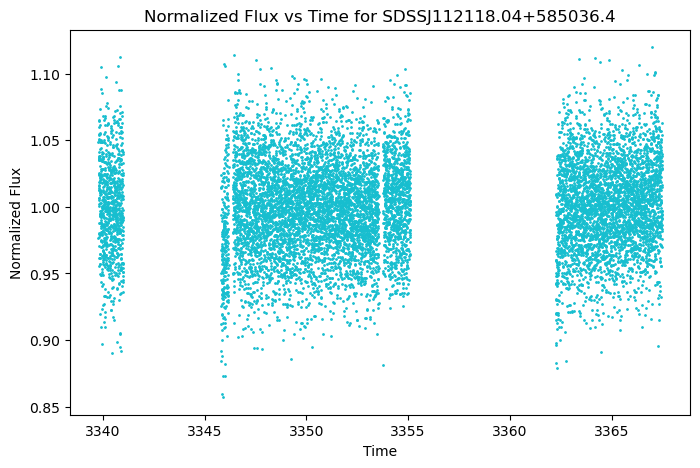

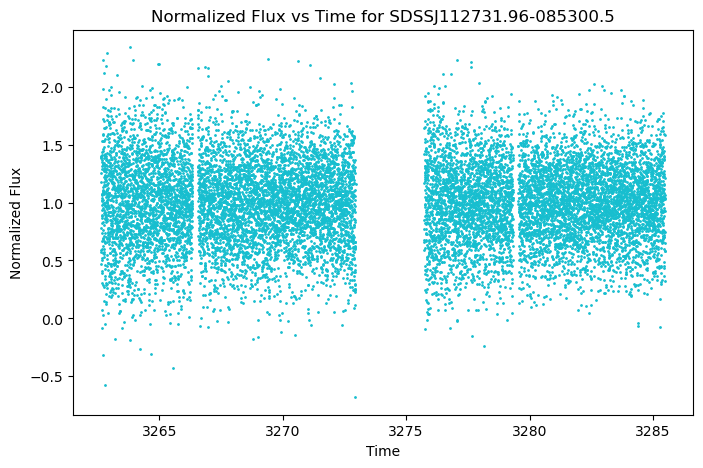

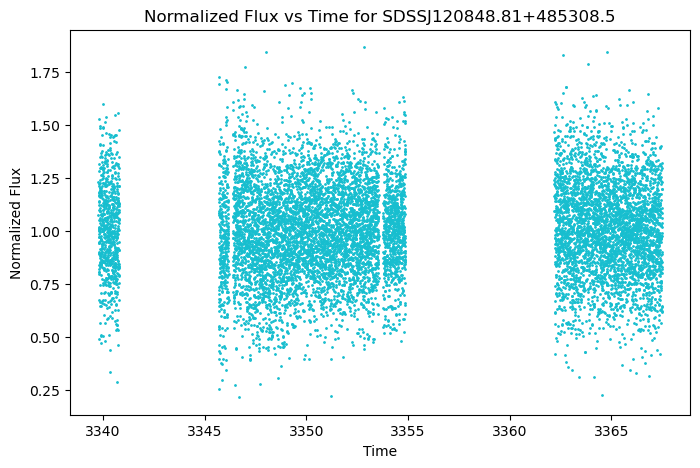

No data found for target "SDSSJ121004.53+190236.7".


No search results for SDSSJ121004.53+190236.7, at col 94


No data found for target "SDSSJ123417.45+195803.0".


No search results for SDSSJ123417.45+195803.0, at col 95


No data found for target "SDSSJ124015.91+235041.0".


No search results for SDSSJ124015.91+235041.0, at col 96


No data found for target "SDSSJ124359.56+251854.5".


No search results for SDSSJ124359.56+251854.5, at col 97


No data found for target "SDSSJ124716.42+172342.0".


No search results for SDSSJ124716.42+172342.0, at col 98


No data found for target "SDSSJ125233.02+180953.1".


No search results for SDSSJ125233.02+180953.1, at col 99


No data found for target "SDSSJ125408.97+191047.6".


No search results for SDSSJ125408.97+191047.6, at col 100


No data found for target "SDSSJ125722.48+191114.1".


No search results for SDSSJ125722.48+191114.1, at col 101


No data found for target "SDSSJ130222.20+263159.6".


No search results for SDSSJ130222.20+263159.6, at col 102


No data found for target "SDSSJ130320.68+204921.9".


No search results for SDSSJ130320.68+204921.9, at col 103


No data found for target "SDSSJ130529.37+230954.0".


No search results for SDSSJ130529.37+230954.0, at col 104


No data found for target "SDSSJ130753.60+010204.2".


No search results for SDSSJ130753.60+010204.2, at col 105


No data found for target "SDSSJ130804.66-004031.6".


No search results for SDSSJ130804.66-004031.6, at col 106


No data found for target "SDSSJ130902.93+222655.5".


No search results for SDSSJ130902.93+222655.5, at col 107


No data found for target "SDSSJ131216.44+215824.8".


No search results for SDSSJ131216.44+215824.8, at col 108


No data found for target "SDSSJ131511.25-001449.9".


No search results for SDSSJ131511.25-001449.9, at col 109


No data found for target "SDSSJ132732.31+155754.7".


No search results for SDSSJ132732.31+155754.7, at col 110


No data found for target "SDSSJ133113.90+202642.5".


No search results for SDSSJ133113.90+202642.5, at col 111


No data found for target "SDSSJ133156.90+221039.8".


No search results for SDSSJ133156.90+221039.8, at col 112


No data found for target "SDSSJ133755.99+240722.6".


No search results for SDSSJ133755.99+240722.6, at col 113


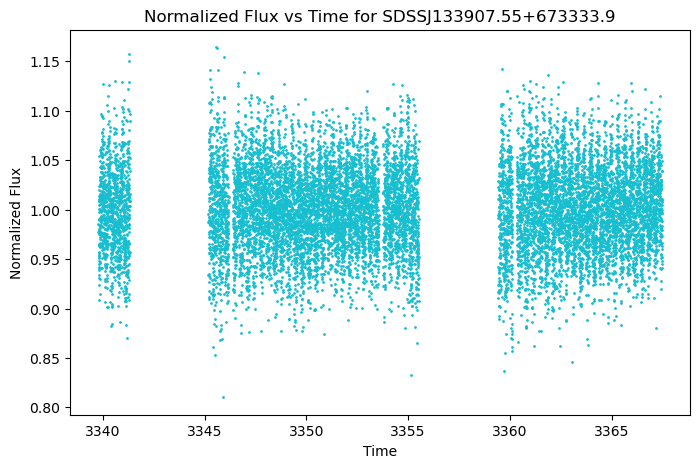

No data found for target "SDSSJ133956.19+092933.7".


No search results for SDSSJ133956.19+092933.7, at col 115


No data found for target "SDSSJ134613.91+214432.1".


No search results for SDSSJ134613.91+214432.1, at col 117


No data found for target "SDSSJ134943.93+162002.0".


No search results for SDSSJ134943.93+162002.0, at col 118


No data found for target "SDSSJ140041.71+241316.6".


No search results for SDSSJ140041.71+241316.6, at col 119


No data found for target "SDSSJ140115.68+214157.1".


No search results for SDSSJ140115.68+214157.1, at col 120


No data found for target "SDSSJ141811.97+204150.8".


No search results for SDSSJ141811.97+204150.8, at col 121


No data found for target "SDSSJ143307.78+073927.1".


No search results for SDSSJ143307.78+073927.1, at col 122


No data found for target "SDSSJ145449.27+072512.7".


No search results for SDSSJ145449.27+072512.7, at col 123


No data found for target "SDSSJ151831.40+021741.3".


No search results for SDSSJ151831.40+021741.3, at col 124


No data found for target "SDSSJ152511.17+151736.6".


No search results for SDSSJ152511.17+151736.6, at col 125


No data found for target "SDSSJ152834.51+152930.4".


No search results for SDSSJ152834.51+152930.4, at col 126


No data found for target "SDSSJ153109.83+155536.9".


No search results for SDSSJ153109.83+155536.9, at col 127


No data found for target "SDSSJ155019.68+051212.6".


No search results for SDSSJ155019.68+051212.6, at col 128


No data found for target "SDSSJ155317.15+052101.7".


No search results for SDSSJ155317.15+052101.7, at col 129


No data found for target "SDSSJ160134.59+113954.4".


No search results for SDSSJ160134.59+113954.4, at col 130


No data found for target "SDSSJ160358.77+182843.9".


No search results for SDSSJ160358.77+182843.9, at col 131


No data found for target "SDSSJ160630.06+104345.4".


No search results for SDSSJ160630.06+104345.4, at col 132


No data found for target "SDSSJ160724.67+192448.8".


No search results for SDSSJ160724.67+192448.8, at col 133


No data found for target "SDSSJ160850.93+173500.9".


No search results for SDSSJ160850.93+173500.9, at col 134


No data found for target "SDSSJ161219.26+090304.6".


No search results for SDSSJ161219.26+090304.6, at col 135


No data found for target "SDSSJ161438.00+175932.7".


No search results for SDSSJ161438.00+175932.7, at col 136


No data found for target "SDSSJ162209.32+500752.5".


No search results for SDSSJ162209.32+500752.5, at col 137


No data found for target "SDSSJ162834.65+182947.8".


No search results for SDSSJ162834.65+182947.8, at col 138


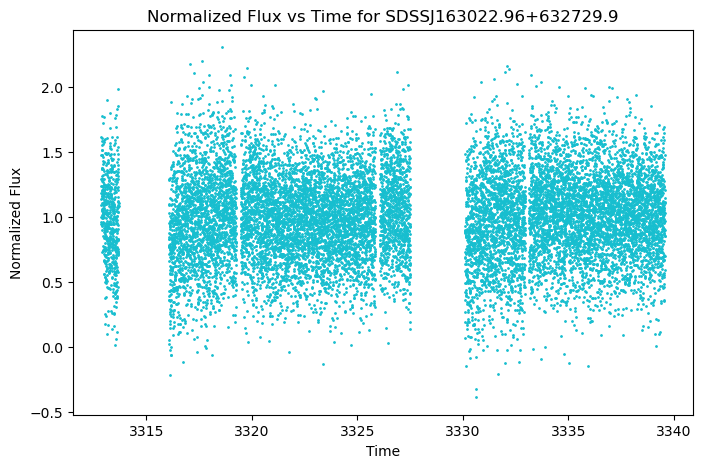

No data found for target "SDSSJ163756.36+114142.3".


No search results for SDSSJ163756.36+114142.3, at col 140


No data found for target "SDSSJ165329.97+134102.9".


No search results for SDSSJ165329.97+134102.9, at col 141


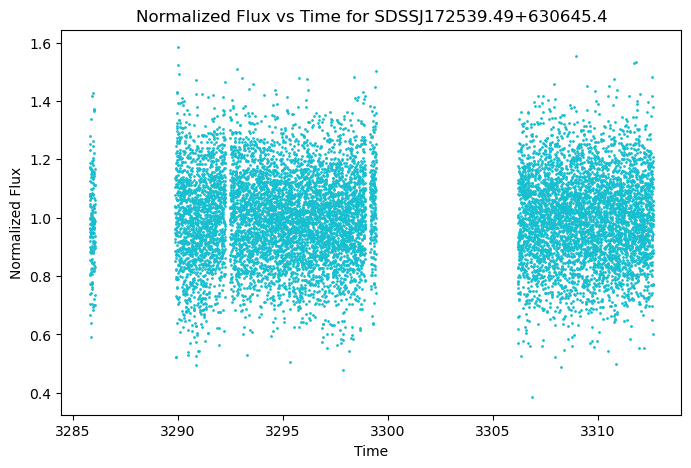

No data found for target "SDSSJ220919.84+072358.1".


No search results for SDSSJ220919.84+072358.1, at col 143


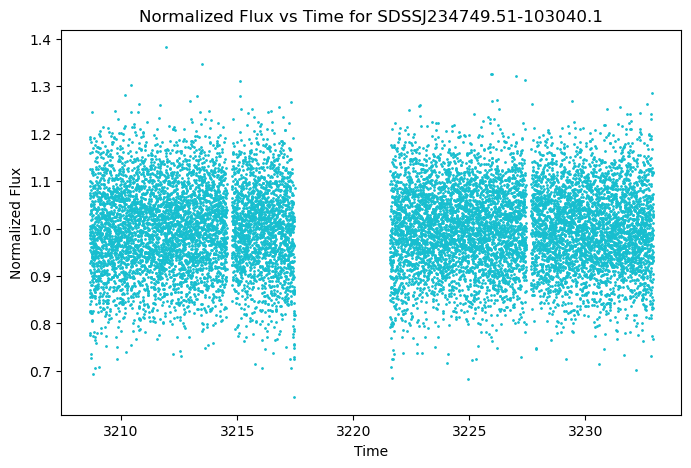

No data found for target "SDSSJ000109.42+255459.5".


No search results for SDSSJ000109.42+255459.5, at col 145


No data found for target "SDSSJ030247.65+372125.9".


No search results for SDSSJ030247.65+372125.9, at col 146


No data found for target "SDSSJ042053.72+064922.4".


No search results for SDSSJ042053.72+064922.4, at col 147


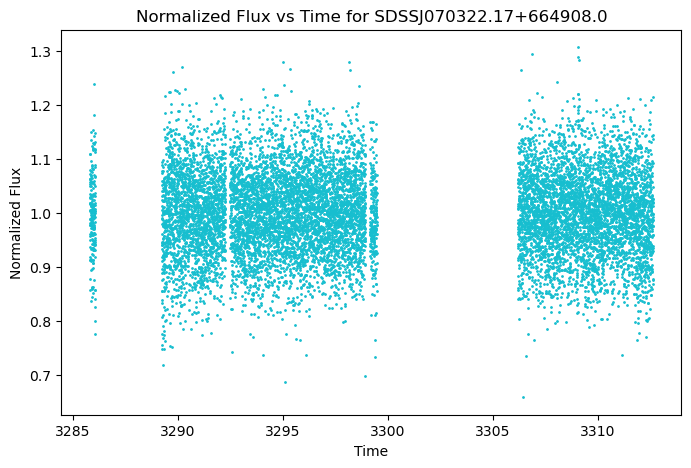

No data found for target "SDSSJ073003.87+405450.1".


No search results for SDSSJ073003.87+405450.1, at col 149


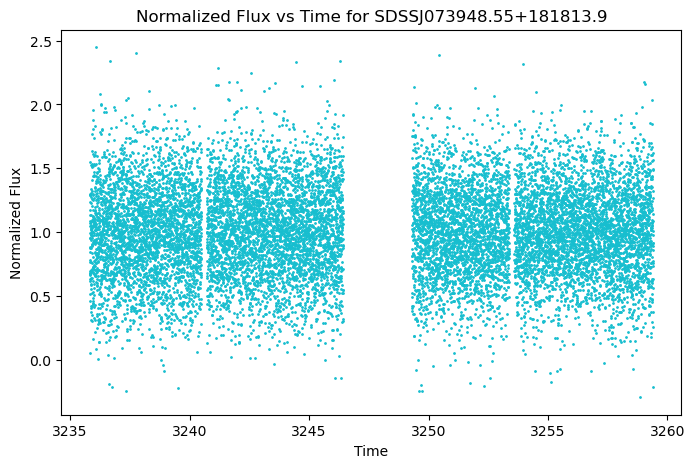

No data found for target "SDSSJ082807.91-052045.5".


No search results for SDSSJ082807.91-052045.5, at col 151


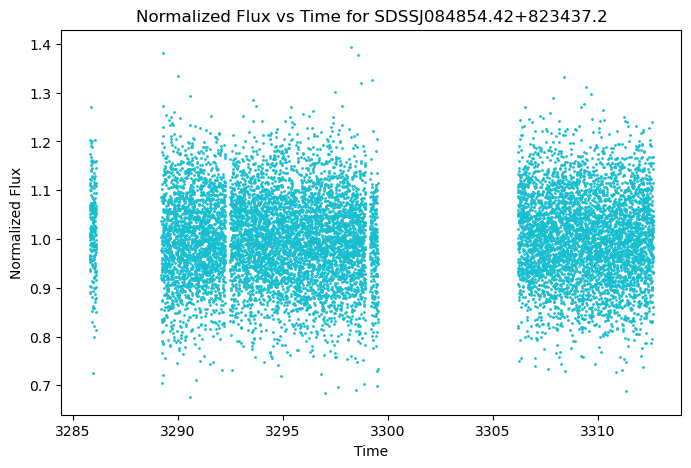

No data found for target "SDSSJ085110.25+024731.8".


No search results for SDSSJ085110.25+024731.8, at col 153


No data found for target "SDSSJ092030.33+301831.2".


No search results for SDSSJ092030.33+301831.2, at col 154


No data found for target "SDSSJ100828.18+263732.5".


No search results for SDSSJ100828.18+263732.5, at col 155


No data found for target "SDSSJ105008.93+473748.0".


No search results for SDSSJ105008.93+473748.0, at col 156


No data found for target "SDSSJ105042.59+470628.7".


No search results for SDSSJ105042.59+470628.7, at col 157


No data found for target "SDSSJ111920.11-104810.6".


No search results for SDSSJ111920.11-104810.6, at col 158


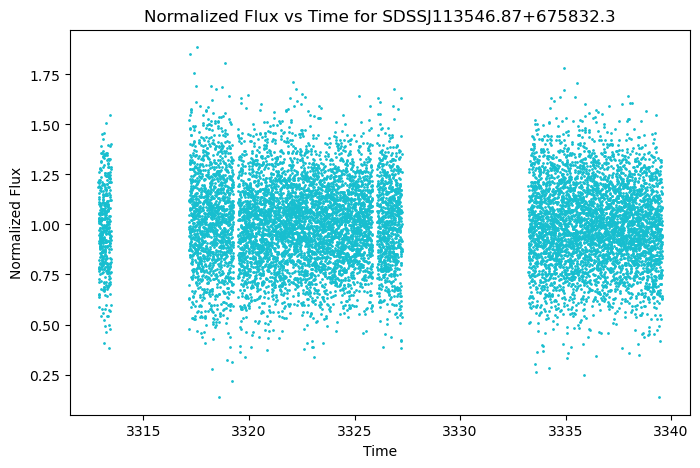

No data found for target "SDSSJ122644.16+010302.5".


No search results for SDSSJ122644.16+010302.5, at col 160


No data found for target "SDSSJ125316.24+100744.1".


No search results for SDSSJ125316.24+100744.1, at col 161


No data found for target "SDSSJ125903.39+193145.7".


No search results for SDSSJ125903.39+193145.7, at col 162


No data found for target "SDSSJ134207.24+285707.9".


No search results for SDSSJ134207.24+285707.9, at col 163


No data found for target "SDSSJ134641.59+174357.4".


No search results for SDSSJ134641.59+174357.4, at col 164


No data found for target "SDSSJ142405.07+553008.0".


No search results for SDSSJ142405.07+553008.0, at col 165


No data found for target "SDSSJ142541.80+442411.7".


No search results for SDSSJ142541.80+442411.7, at col 166


No data found for target "SDSSJ151744.70+062011.9".


No search results for SDSSJ151744.70+062011.9, at col 167


No data found for target "SDSSJ155811.24+253803.2".


No search results for SDSSJ155811.24+253803.2, at col 168


No data found for target "SDSSJ173153.03+065233.6".


No search results for SDSSJ173153.03+065233.6, at col 169


No data found for target "SDSSJ224819.40+304803.6".


No search results for SDSSJ224819.40+304803.6, at col 170


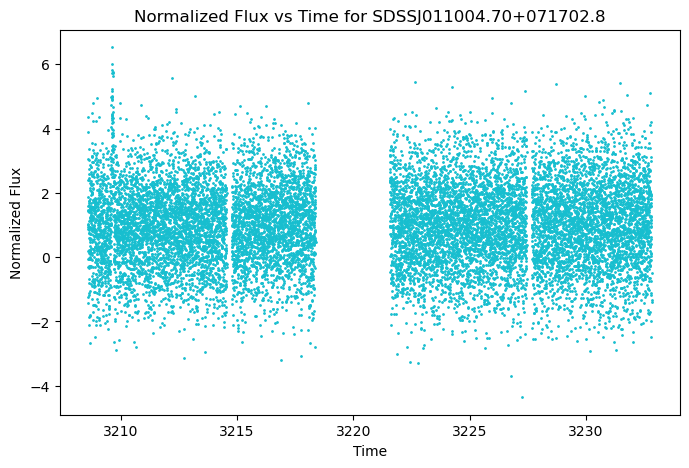

No data found for target "SDSSJ014113.10-084831.0".


No search results for SDSSJ014113.10-084831.0, at col 172


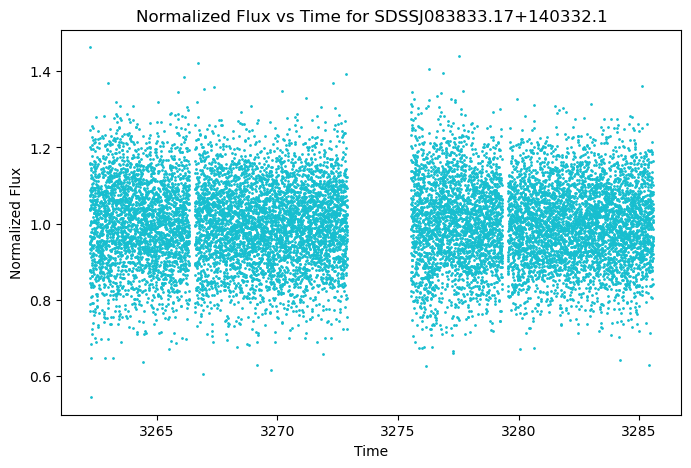

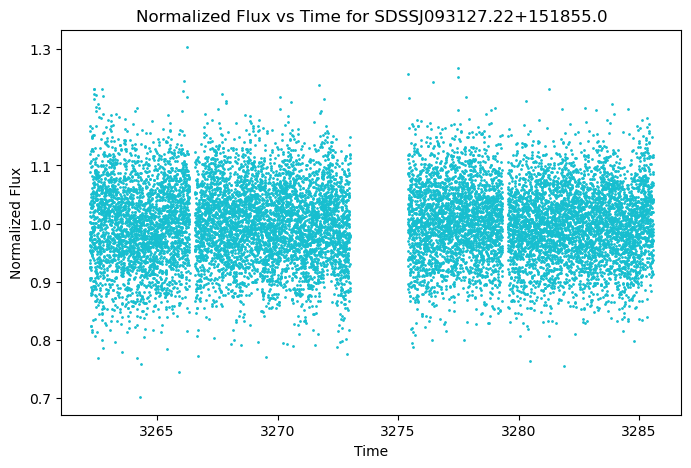

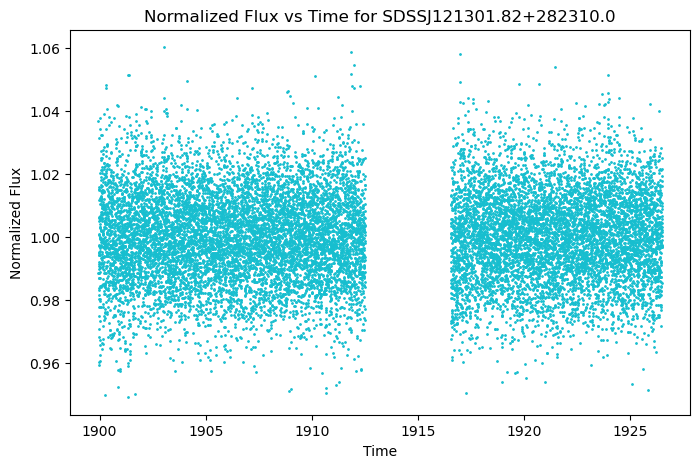

No data found for target "SDSSJ151251.47+010201.2".


No search results for SDSSJ151251.47+010201.2, at col 176


No data found for target "SDSSJ235143.39+362736.6".


No search results for SDSSJ235143.39+362736.6, at col 177


No data found for target "SDSSJ004718.50+332145.9".


No search results for SDSSJ004718.50+332145.9, at col 178


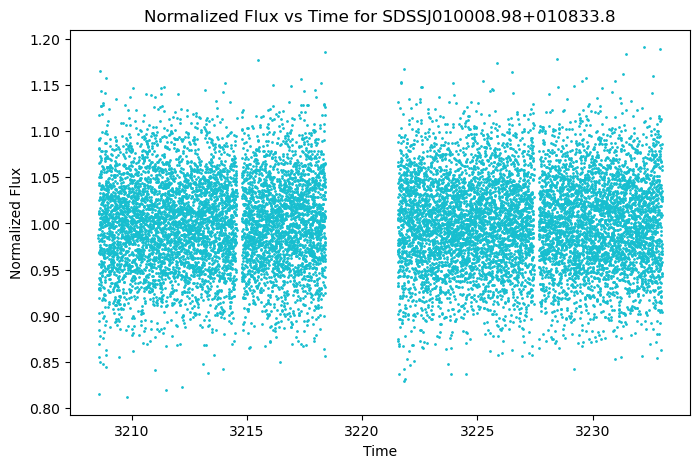

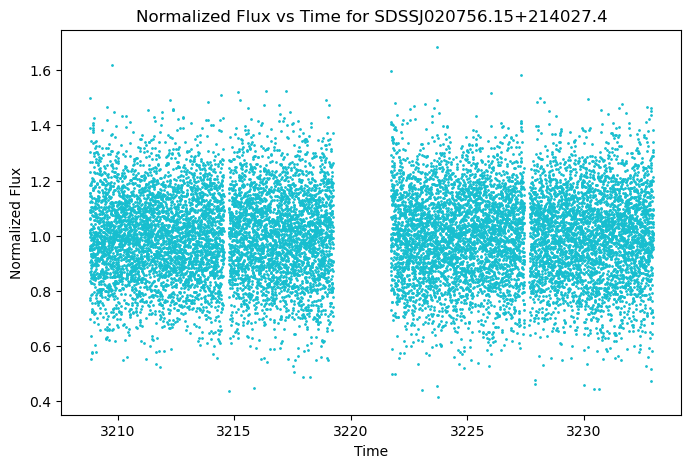

No data found for target "SDSSJ022615.69-010423.9".


No search results for SDSSJ022615.69-010423.9, at col 181


No data found for target "SDSSJ023801.83+001038.0".


No search results for SDSSJ023801.83+001038.0, at col 182


No data found for target "SDSSJ071640.06+394511.2".


No search results for SDSSJ071640.06+394511.2, at col 183


No data found for target "SDSSJ072259.32+411149.4".


No search results for SDSSJ072259.32+411149.4, at col 184


No data found for target "SDSSJ074649.67+381303.6".


No search results for SDSSJ074649.67+381303.6, at col 185


No data found for target "SDSSJ074843.23+384218.6".


No search results for SDSSJ074843.23+384218.6, at col 186


No data found for target "SDSSJ074935.41+521928.4".


No search results for SDSSJ074935.41+521928.4, at col 187


No data found for target "SDSSJ075137.64+395658.3".


No search results for SDSSJ075137.64+395658.3, at col 188


No data found for target "SDSSJ075619.59+523753.9".


No search results for SDSSJ075619.59+523753.9, at col 189


No data found for target "SDSSJ082516.11+515103.7".


No search results for SDSSJ082516.11+515103.7, at col 190


No data found for target "SDSSJ083830.16+431546.0".


No search results for SDSSJ083830.16+431546.0, at col 191


No data found for target "SDSSJ083832.76+012440.5".


No search results for SDSSJ083832.76+012440.5, at col 192


No data found for target "SDSSJ084028.85+501238.2".


No search results for SDSSJ084028.85+501238.2, at col 193


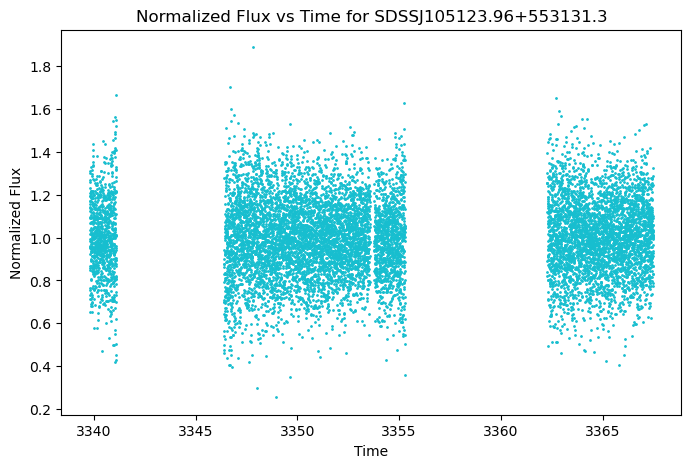

In [19]:
stars_df = pd.read_csv('comma_band_query.csv')

for index, star in enumerate(stars_df['iau_name']):
    try:
        search_result = lk.search_lightcurve(star, mission='TESS')
        exposures = search_result.exptime
    
        # Try to find 120 cadence
        for i, exp in enumerate(exposures):
            if exp.value == float(120):
                lightcurve = search_result[i].download().remove_nans().remove_outliers().normalize()
                time = lightcurve.time.value
                flux = lightcurve.flux
    
                plt.figure(figsize=(8,5))
                plt.title(f"Normalized Flux vs Time for {star}")
                plt.ylabel("Normalized Flux")
                plt.xlabel("Time")
                plt.scatter(time, flux, color = palette[9], s=1)
                plt.show()
                break
    except:
        print(f"No search results for {star}, at col {index}")

        